In [1]:
import numpy as np
import tqdm 
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl 
import astropy.units as u
from astropy.constants import G, M_sun
from plotting_setup import *

import sys

sys.path.append('../pipeline_scripts/')
from pipeline_main import pipeline, dist, calc_ang
from pipeline_2D import to_osyris_ivs
from pipeline_streamers import phi_average

In [2]:
data = pipeline(snap = 394, run = 'sink13fmr05', sink_id=13)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4165/4165 [00:11<00:00, 356.55it/s]


In [3]:
data.recalc_L(), data.calc_trans_xyz()

Converged mean angular momentum vector after 1 iteration(s)
Transforming old z-coordinate into mean angular momentum vector


100%|██████████| 4165/4165 [00:01<00:00, 3108.97it/s]


(None, None)

In [4]:
for p in tqdm.tqdm(data.sn.patches):
    p.vx, p.vy, p.vz = p.trans_vrel

100%|██████████| 4165/4165 [00:00<00:00, 294164.89it/s]


In [12]:
res = 1000; width = 4000; dz = 5000
data.to_osyris_ivs(variables=['d'], data_name = 'face_on_dens', view = width, resolution=res, viewpoint = 'top', weights=None)


Looping over DISPATCH data to extract data at highest level


100%|██████████| 2190/2190 [00:06<00:00, 314.64it/s]


Setting up Osyris data structure


In [30]:
data.to_osyris_ivs(variables=['vx', 'vy'], data_name = 'face_on_vel', view = width, resolution=res, viewpoint='edge' , weights='mass', dz = dz)

Looping over DISPATCH data to extract data at highest level


  0%|          | 0/2400 [00:00<?, ?it/s]

100%|██████████| 2400/2400 [00:11<00:00, 207.69it/s]


Setting up Osyris data structure


In [14]:
Σ_face_on = data.osyris_ivs['face_on_dens']['d'] * data.cgs_density

vx = data.osyris_ivs['face_on_vel']['vx'] * data.cms_velocity
vy = data.osyris_ivs['face_on_vel']['vy'] * data.cms_velocity
vel_norm = np.sqrt(vx**2 + vy**2)
X, Y = [np.linspace(-width //2, width // 2, res) for _ in range(2)]




KeyError: 'face_on_vel'

NameError: name 'strm' is not defined

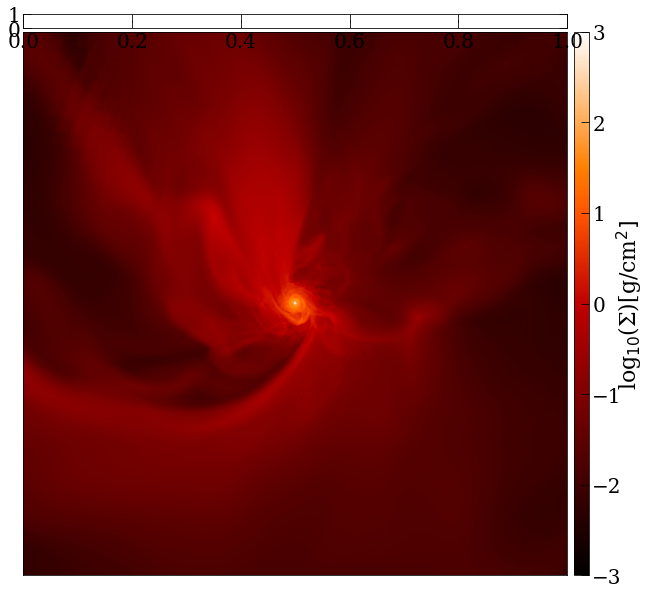

In [15]:
vmin_strm, vmax_strm = 4, 6.5
ext = width // 2
norm = mpl.colors.Normalize(vmin=vmin_strm, vmax=vmax_strm)
vmin_colormap, vmax_colormap = -3, 3


####________________________________PLOTTING__________________________________####


fig, axs = plt.subplots(1, 1, figsize = (10, 10))
axs.set_xticks([]); axs.set_yticks([])

axs.set(ylim = (-ext, ext), xlim = (-ext, ext))
cs = axs.imshow(np.log10(Σ_face_on), extent = (-ext, ext, -ext, ext), origin ='lower', cmap = 'gist_heat', vmin = vmin_colormap, vmax = vmax_colormap)

#strm  = axs.streamplot(X, Y, vx , vy, color = np.log10(vel_norm), cmap=mpl.cm.binary_r, arrowsize=1.5, norm = norm, density = 1.75)

cbaxes = fig.add_axes([0.9, 0.125, 0.02, 0.755])
cbar = fig.colorbar(cs, cax = cbaxes)
cbar.set_label('log$_{10}$(Σ)[g/cm$^{2}]$', labelpad = -7, fontsize = 22)# y = 1.11, rotation = 0, fontsize = 20)

cbaxes_top = fig.add_axes([0.135, 0.885, 0.755, 0.02])  # Position and size adjusted for top placement
cbar_top = fig.colorbar(strm.lines, cax = cbaxes_top, orientation='horizontal')
cbar_top.ax.xaxis.set_ticks_position("top")
cbar_top.set_label('log$_{10}$(v) [cm/s]', labelpad = 10, fontsize=22)
cbar_top.ax.xaxis.set_ticks_position('top')
cbar_top.ax.xaxis.set_label_position('top')

scalebar = AnchoredSizeBar(axs.transData, 1000  , '1000 au', 'lower left', 
                    pad=0.5,
                    color='Black',
                    frameon=True,
                    fontproperties = fm.FontProperties(size=22),
                    size_vertical=1,
                    label_top=True)

axs.add_artist(scalebar)



#plt.savefig(save_folder + 'osyris_jet', facecolor = 'w', bbox_inches='tight', dpi = 500)


In [25]:
data2 = pipeline(snap = 511, run = 'sink13fmr05', sink_id=13)
data2.recalc_L(), data2.calc_trans_xyz()

for p in tqdm.tqdm(data2.sn.patches):
    p.vx, p.vx, p.vy = p.trans_vrel

data2.to_osyris_ivs(variables=['d'], data_name = 'face_on_dens', view = width, resolution=res, viewpoint = 'edge', weights=None,  dz = dz)
data2.to_osyris_ivs(variables=['vx', 'vy'], data_name = 'face_on_vel', view = width, resolution=res, viewpoint='edge' , weights='mass',  dz = dz)

Σ_face_on2 = data2.osyris_ivs['face_on_dens']['d'] * data.cgs_density

vx2 = data2.osyris_ivs['face_on_vel']['vx'] * data2.cms_velocity
vy2 = data2.osyris_ivs['face_on_vel']['vy'] * data2.cms_velocity
vel_norm2 = np.sqrt(vx2**2 + vy2**2)


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4165/4165 [00:05<00:00, 751.87it/s]


Converged mean angular momentum vector after 0 iteration(s)
Transforming old z-coordinate into mean angular momentum vector


100%|██████████| 4165/4165 [00:00<00:00, 306107.98it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 1411/1411 [00:06<00:00, 217.68it/s]


Setting up Osyris data structure
Looping over DISPATCH data to extract data at highest level


100%|██████████| 1411/1411 [00:05<00:00, 263.33it/s]


Setting up Osyris data structure


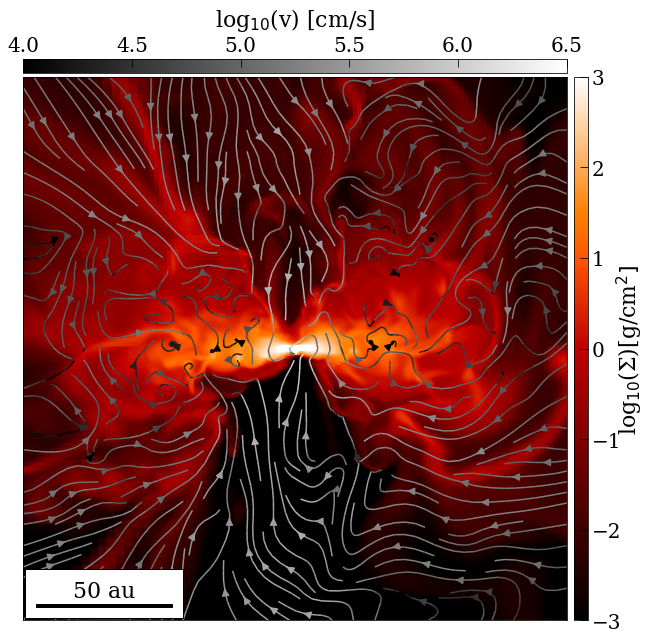

In [33]:
vmin_strm, vmax_strm = 4, 6.5

norm = mpl.colors.Normalize(vmin=vmin_strm, vmax=vmax_strm)
vmin_colormap, vmax_colormap = -3, 3


####________________________________PLOTTING__________________________________####


fig, axs = plt.subplots(1, 1, figsize = (10, 10))
axs.set_xticks([]); axs.set_yticks([])

axs.set(ylim = (-ext, ext), xlim = (-ext, ext))
cs = axs.imshow(np.log10(Σ_face_on2), extent = (-ext, ext, -ext, ext), origin ='lower', cmap = 'gist_heat', vmin = vmin_colormap, vmax = vmax_colormap)

strm  = axs.streamplot(X, Y, vx2 , vy2, color = np.log10(vel_norm2), cmap=mpl.cm.binary_r, arrowsize=1.5, norm = norm, density = 1.75)

cbaxes = fig.add_axes([0.9, 0.125, 0.02, 0.755])
cbar = fig.colorbar(cs, cax = cbaxes)
cbar.set_label('log$_{10}$(Σ)[g/cm$^{2}]$', labelpad = -7, fontsize = 22)# y = 1.11, rotation = 0, fontsize = 20)

cbaxes_top = fig.add_axes([0.135, 0.885, 0.755, 0.02])  # Position and size adjusted for top placement
cbar_top = fig.colorbar(strm.lines, cax = cbaxes_top, orientation='horizontal')
cbar_top.ax.xaxis.set_ticks_position("top")
cbar_top.set_label('log$_{10}$(v) [cm/s]', labelpad = 10, fontsize=22)
cbar_top.ax.xaxis.set_ticks_position('top')
cbar_top.ax.xaxis.set_label_position('top')

scalebar = AnchoredSizeBar(axs.transData, 50  , '50 au', 'lower left', 
                    pad=0.5,
                    color='Black',
                    frameon=True,
                    fontproperties = fm.FontProperties(size=22),
                    size_vertical=1,
                    label_top=True)

axs.add_artist(scalebar)

#plt.savefig(save_folder + 'osyris_jet2', facecolor = 'w', bbox_inches='tight', dpi = 500)


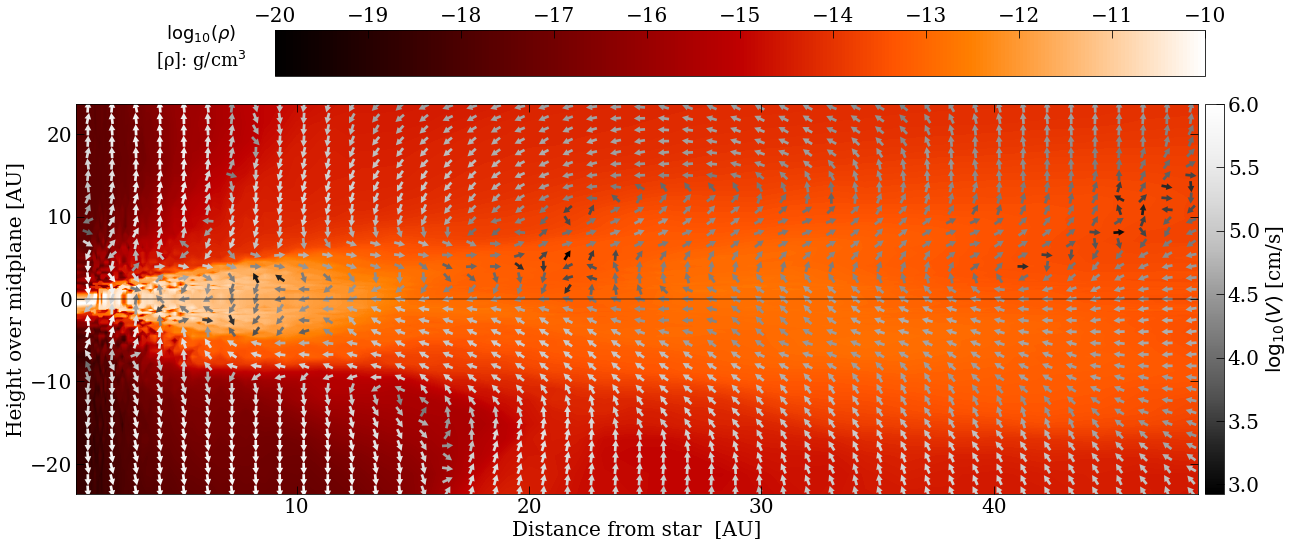

In [27]:
phi_avg = data.phiaverage(log_vmax=-10, height = 25, radius = 50)

In [28]:
phi_avg.keys()

dict_keys(['r_bins', 'z_bins', 'd', 'quiver_r_bins', 'quiver_z_bins', 'hist_vr', 'hist_vz', 'arrow_length'])

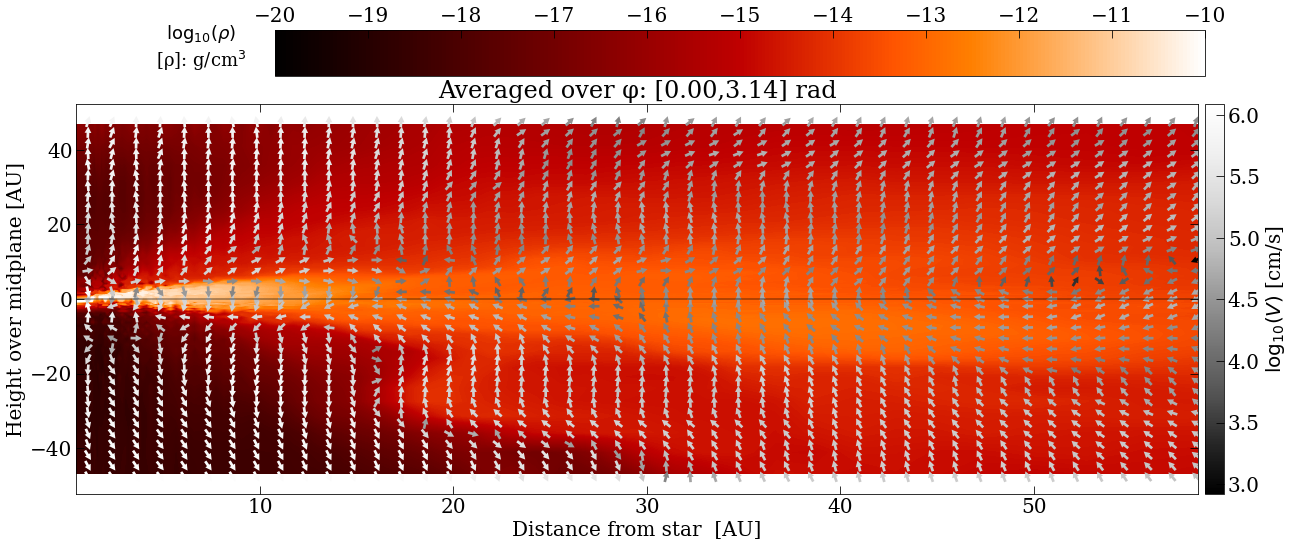

In [29]:
phi_avg = data.phiaverage(log_vmax=-10, height = 50, radius = 60, phi_extent=[0, np.pi])

In [30]:
for p in data.sn.patches:
    if p.id == 3708: break

(array([490., 322., 407., 468., 360., 492., 321., 409., 469., 358.]),
 array([7.05004115e-05, 6.28361859e-01, 1.25665322e+00, 1.88494458e+00,
        2.51323594e+00, 3.14152729e+00, 3.76981865e+00, 4.39811001e+00,
        5.02640137e+00, 5.65469273e+00, 6.28298409e+00]),
 <BarContainer object of 10 artists>)

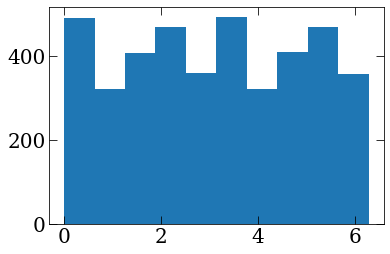

In [31]:
plt.hist(p.φ.flatten())

In [32]:
p.rel_ppos * data.au_length

array([ 0.01028239, -0.00143479, -0.00299624])